
<h1><i> <font color="#000099"><font face="Tribuchet">Resultados</font></font></i></h1>

<p> Nesta secção vamos mostrar o resultados dos modelos em função de dos parâmetros escolhidos usando  <b>Linguagem Julia</b> .</p>

<h3><i> <font color="red">Pacotes: </font></i></h3>

<p>Para a realização dessa tarefefa vamos usar os seguintes pacotes: </p>

In [24]:
using Plots                   # pacote para graficos
using SymPy                   # Pacote para linguagem simbolica
using DifferentialEquations   # pacotes para cálculo
using Calculus


<h3><i> <font color="red">*Modelo Malthus </font></i></h3>

<p>lingaguagem simbólica </p>

In [2]:

#tempo t
t=Sym("t")
#constante de crescimento K>0
k=Sym("k")
#população inicial p(0)
p_0=Sym("p_0")
#P(t)=
p=p_0*exp(k*t)


     k*t
p_0*e   

<p>derivadas </p>

In [3]:
dt=diff(p,t) # derive a função p em função de t

       k*t
k*p_0*e   

<p>Simulação durante um tempo t </p>

In [4]:
#modelo de Malthus
# k deve ser pequene
# t deve ser colocado em forma de intervalo t=t_0:t_f

function M(t,k,p_0) 
  p_0*exp.(k*t)      #exp. faz a iteração
end

M (generic function with 1 method)

In [5]:
n=M(1,1,100); # teste 


<p>Gráfico</p>

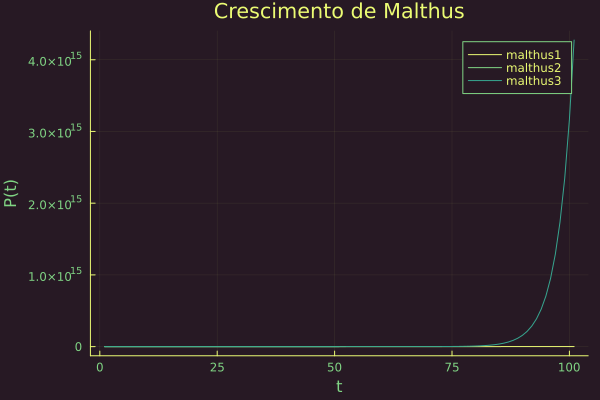

In [9]:
p=M(0:100,0.2,100)
plot(p)
q=M(0:50,0.2,200)
plot(q)
r=M(0:100,0.3,400)
plot(r)

plot(p,title="Crescimento de Malthus",xlabel="t", ylabel="P(t)", label="malthus1")

plot!(q,title="Crescimento de Malthus",xlabel="t", ylabel="P(t)", label="malthus2")#plotar graficos diferentes

plot!(r,title="Crescimento de Malthus",xlabel="t", ylabel="P(t)", label="malthus3")

<h3><i> <font color="red">*Modelo Gompertz </font></i></h3>

In [10]:
#EDO simples
#Sem medicação com população abaixo do limite
using DifferentialEquations
r = 2
k = 1000
g = 0.3
c0 = 2*log(0.8)
#Equação do modelo
f(n,p,t) = -r*n*log(n/k)-c0*n
#Condições iniciais
u0 = 800
range = (0.0,20.0)
prob = ODEProblem(f,u0,range)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
#Plotagem do Modelo
using Plots
plotly()
plot(sol,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="Gompertz")

┌ Info: For saving to png with the Plotly backend PlotlyBase and PlotlyKaleido need to be installed.
└ @ Plots C:\Users\Carlos\.julia\packages\Plots\CUQan\src\backends.jl:319


In [11]:
u0 = 1500
range = (0.0,20.0)
prob = ODEProblem(f,u0,range)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
plotly()
plot(sol,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="Gompertz2")

In [ ]:
u0 = 1500
range = (0.0,20.0)
prob = ODEProblem(f,u0,range)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
plotly()
plot(sol,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="Gompertz2")

<p>Análise de Bifurcações</p>

In [28]:
r1 = 10
r2 = 15
r3 = 20
k = 1000
N0 = zeros(60,1)
N1 = zeros(60,1)
N2 = zeros(60,1)
N3 = zeros(60,1)
for var in 1:60
    x = -var/r1
    N1[var] = k*exp.(x)
    x = -var/r2
    N2[var] = k*exp.(x)
    x = -var/r3
    N3[var] = k*exp.(x)    
end   


In [29]:
plot(N1,title="Crescimento de Gompertz",xlabel="t", ylabel="P(t)", label="Gompertz1")
plot!(N2,title="Crescimento de Gompertz",xlabel="t", ylabel="P(t)", label="Gompertz2")
plot!(N3,title="Crescimento de Gompertz",xlabel="t", ylabel="P(t)", label="Gompertz3")
plot!(N0,title="Crescimento de Gompertz",xlabel="t", ylabel="P(t)", label="Gompertz4")

<p>Efeito da medicação sobre o tumor:</p>

In [12]:
#EDO simples
#Com medicação com população abaixo do limite
using DifferentialEquations
r = 2
k = 1000
g = 0.3
c0 = 2*log(0.8)
#Equação do modelo
f(n,p,t) = -r*n*log(n/k)-c0*t*exp(-0.1*t)*n
#Condições iniciais
u0 = 800
range = (0.0,20.0)
prob = ODEProblem(f,u0,range)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
#Plotagem do Modelo
using Plots
plotly()
plot(sol,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="evolução tratada")


In [19]:
u0 = 1500
range = (0.0,20.0)
prob = ODEProblem(f,u0,range)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
#Plotagem do Modelo
using Plots
plotly()
plot(sol,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="evolução tratada")

G (generic function with 1 method)

<p>Gráfico</p>

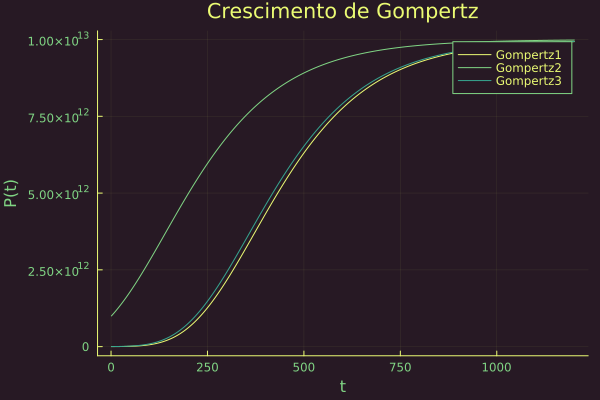

In [88]:
g1=G.(0:1200,0.006,10^13,10^9)
g2=G.(0:1200,0.006,10^13,10^12)
g3=G.(0:1200,0.006,10^13,2*10^9)


plot(g1,title="Crescimento de Gompertz",xlabel="t", ylabel="P(t)", label="Gompertz1")
plot!(g2,title="Crescimento de Gompertz",xlabel="t", ylabel="P(t)", label="Gompertz2")
plot!(g3,title="Crescimento de Gompertz",xlabel="t", ylabel="P(t)", label="Gompertz3")



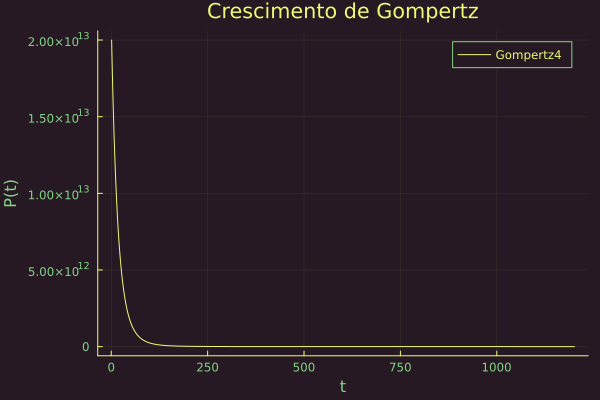

In [94]:
g4=G.(0:1200,0.006,10^9,2*10^13)

plot(g4,title="Crescimento de Gompertz",xlabel="t", ylabel="P(t)", label="Gompertz4")

<p>População máxima</p>

<h3><i> <font color="red">*Modelo Bertalanffy </font></i></h3>

In [20]:

#EDO simples
#Sem medicação com população abaixo do limite
using DifferentialEquations
a = 10
b = 1
alpha = 2/3
beta = 1
#Equação do modelo
f(n,p,t) = a*n^(alpha)-b*n^(beta)
#Condições iniciais
u0 = 800
range = (0.0,20.0)
prob = ODEProblem(f,u0,range)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
#Plotagem do Modelo
using Plots
plotly()
plot(sol,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="Bertalanffy1")


In [21]:
u0 = 1500
range = (0.0,20.0)
prob = ODEProblem(f,u0,range)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
#Plotagem do Modelo
using Plots
plotly()
plot(sol,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="Bertalanffy2")

<p> efeito da medicação </p>

In [23]:

#EDO simples
#Com medicação com população abaixo do limite
12
using DifferentialEquations
a = 10
b = 1
alpha = 2/3
beta = 1
#Equação do modelo
f(n,p,t) = a*n^(alpha)-b*t*exp(-0.1*t)*n^(beta)
#Condições iniciais
u0 = 800
range = (0.0,20.0)
prob = ODEProblem(f,u0,range)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
#Plotagem do Modelo
using Plots
plotly()
plot(sol,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="com medicação!")

<p>Caso a população maxima seja menor que a populçao inicial </p>

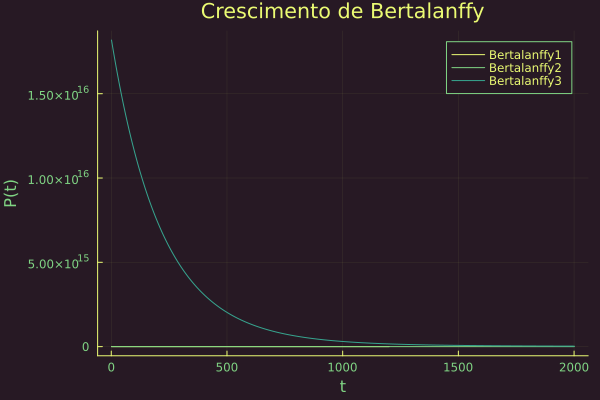

In [91]:
b3=B.(0:2000,0.005,5.5*10^9,10^13)
plot!(b3,title="Crescimento de Bertalanffy",xlabel="t", ylabel="P(t)", label="Bertalanffy3")

In [39]:
function B(t,k,p_0) # t deve ser colocado em forma de intervalo t=t_0:t_f
   p_0.*(1-exp.(k*t))
end

B (generic function with 2 methods)

In [40]:
b1=B.(0:200,0.05,10^13,10^7)
b2=B.(0:200,0.05,10^7,10^13)
b3=B.(0:1000,0.5,10^13,10^9)

plot(b1,title="Crescimento de Bertalanffy",xlabel="t", ylabel="P(t)", label="Bertalanffy1")
plot!(b2,title="Crescimento de Bertalanffy",xlabel="t", ylabel="P(t)", label="Bertalanffy2")

LoadError: PyError (ccall(#= C:\Users\Carlos\.julia\packages\PyCall\ygXW2\src\conversions.jl:59 =# @pysym(:PyFloat_AsDouble), Cdouble, (PyPtr,), po)) <class 'TypeError'>
TypeError('Cannot convert expression to float')
  File "C:\Users\Carlos\.julia\conda\3\lib\site-packages\sympy\core\expr.py", line 351, in __float__
    raise TypeError("Cannot convert expression to float")


<h3><i> <font color="red">*Modelo de Tratamento:Kohandel </font></i></h3>

In [139]:

#Tempo de observação
t=Sym("t");
#Tamanho maximo do tumor
k=Sym("k");
#constante de crescimento intrínseca das células
r=Sym("r");
c_0=Sym("c_0");
s=Sym("S")
e=Sym("e");
#população inicial N(0)
n_0=Sym("n_0");


<p>primeiro caso :  se a quimioterapia ea cirurgia ainda não ocorreram </p>



In [134]:
#é a propria equação de Gompertz , já vimos 
nt=k*(n_0/k)^exp(-r*t)


       / -r*t\
       \e    /
  /n_0\       
k*|---|       
  \ k /       

<p> Segundo caso: a quimioterapia aconteceu , mas a cirutgia ainda não</p>

In [135]:
nt=k*exp(e-r*t*(c1+log(n_0/k)))


           /        /n_0\\
   e - r*t*|c1 + log|---||
           \        \ k //
k*e                       

In [ ]:
<p>concentração de medicamentos</p>

In [138]:
ct=c_0*s*t*exp(-r*t)

         -r*t
c_0*s*t*e    

In [ ]:
#injeção de medicamentos
function C(c_0,s,t,r) # t deve ser colocado em forma de intervalo t=t_0:t_f
   k*exp(exp(1)-r*t*(c1+log(n_0/k)))
end


In [126]:
function K(t,r,c1,k,n_0) # t deve ser colocado em forma de intervalo t=t_0:t_f
   k*exp(exp(1)-r*t*(c1+log(n_0/k)))
end

K (generic function with 2 methods)

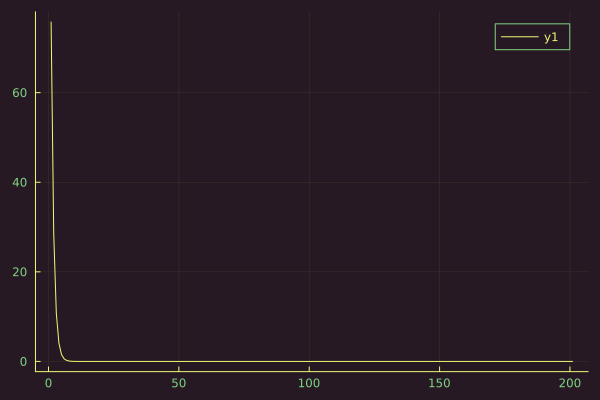

In [130]:
k1=K.(0:200,0.05,1,5,5.5*10^8)  
plot(k1)

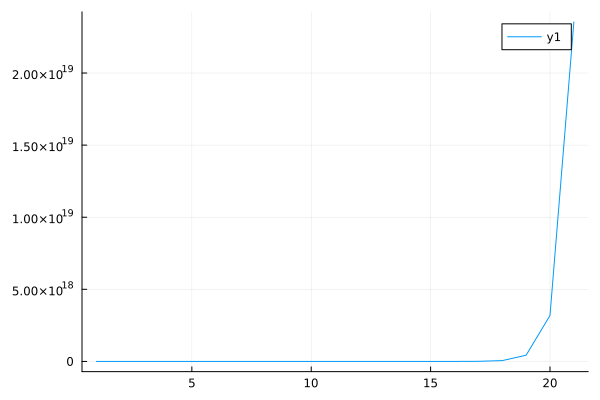

In [51]:
#usar analise de sensibilidade...
#p_0*exp.(k*t)

t= 0:5
A(x)=100*exp.(2*t)
B(x)=100*exp.(2*)
C(x)=100*exp(2*)
plot(A)
plot!(B)
plot!(C)

In [79]:
n_0=10^9
r=0.006
k=10^3
function G(t) # t deve ser colocado em forma de intervalo t=t_0:t_f
  k*exp(exp(r*t)*log*((n_0))/k)
    
end

G (generic function with 2 methods)

In [81]:
g=G.(0:1200)
plot(g)

LoadError: MethodError: no method matching *(::Float64, ::typeof(log))
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:591
[0m  *(::T, [91m::T[39m) where T<:Union{Float16, Float32, Float64} at float.jl:385
[0m  *(::Union{Float16, Float32, Float64}, [91m::BigFloat[39m) at mpfr.jl:414
[0m  ...

In [10]:
n_0=10^9
r=0.006
k=10^13
function H(t) # t deve ser colocado em forma de intervalo t=t_0:t_f
  k*(exp(1))^(-exp(1)^((r*t)*log((n_0)/k)))
end

H (generic function with 1 method)

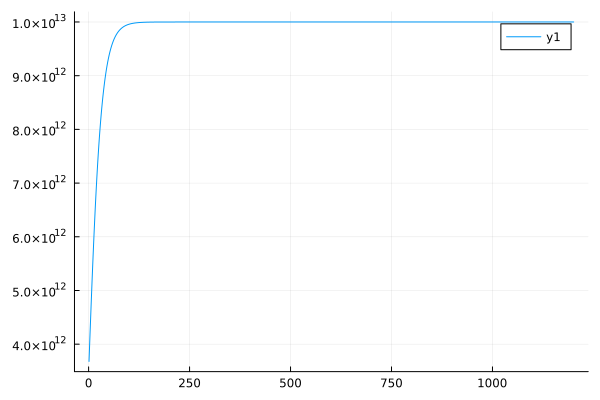

In [11]:
h=H.(0:1200)
plot(h)

In [102]:
using SymPy
k=Sym("k")
e=Sym("e")
n_0=Sym("n_0")
r=Sym("r")
t=Sym("t")

N=k*(e^(-e^((r*t)*log((n_0)/k))))

          /n_0\  
   r*t*log|---|  
          \ k /  
 -e              
e              *k

In [139]:
log(exp(1))


1.0

In [2]:
import Pkg;
Pkg.add("Calculus")

    Updating registry at `C:\Users\Carlos\.julia\registries\General.toml`
   Resolving package versions...
    Updating `C:\Users\Carlos\.julia\environments\v1.8\Project.toml`
  [49dc2e85] + Calculus v0.5.1
  No Changes to `C:\Users\Carlos\.julia\environments\v1.8\Manifest.toml`


In [3]:
using Calculus

g1 = derivative(sin)
g1(0.0)
g1(1.0)
g1(pi)

-0.9999999999441258

In [4]:
g2=cos(pi)

-1.0

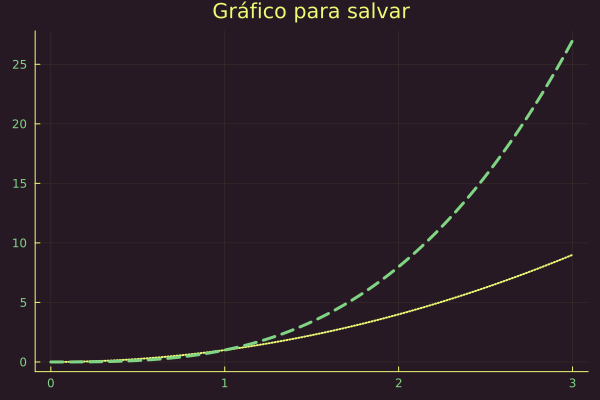

In [84]:
x = 0 : 0.01 : 3
y = x.^2
w = x.^3
theme(:lime)
p = plot(x,[y w],ls = [:dot :dash],lw = [2 3], leg=false)
p = plot!(title="Gráfico para salvar")

savefig(p,"nome_do_grafico.png")

p

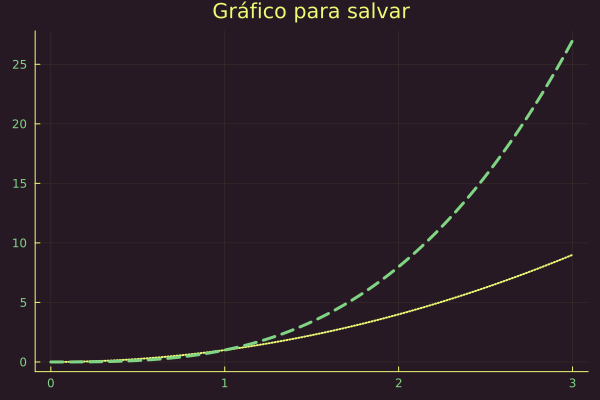

In [6]:
x = 0 : 0.01 : 3
y = x.^2
w = x.^3
theme(:lime)
p = plot(x,[y w],ls = [:dot :dash],lw = [2 3], leg=false)
p = plot!(title="Gráfico para salvar")

savefig(p,"nome_do_grafico.png")

p